# Exploratory Data Analysis (EDA)
In questo notebook eseguiremo un'analisi esplorativa dei dati per capire meglio il dataset e le sue caratteristiche.

## Import delle librerie
Iniziamo importando le librerie necessarie per l'analisi dei dati.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Caricamento dei dati
Carichiamo il dataset e visualizziamo le prime righe per visualizzare la struttura del dataset.

In [ ]:
dataset = pd.read_csv("../../data/processed/GYTS_dataset.csv")
dataset.head()

## Impostazione del tipo di colonna
Impostiamo il tipo di colonna per le colonne categoriche e booleane.

In [ ]:

# Conversione delle colonne in categoriche
categorical_columns = ["State", "Gender", "Age", "SmokingFriends", "SeenSmokerInPublicPlace",
                       "SeenSmokerInEnclosedPlace", "SeenSmokerInHome", "AttractiveSmoker",
                       "HardQuitSmoke", "SmokerConfidentInCelebrations", "SchoolWarnings",
                       "SeenHealthWarnings", "AntiTobaccoInEvents", "HarmfulPassiveSmoke"]
dataset[categorical_columns] = dataset[categorical_columns].astype('category')

# Conversione delle colonne in booleane
boolean_columns = ["Smoke", "SeenSmokerInSchool", "ParentWarnings", "AntiTobaccoInMedia",
                   "BanTobaccoOutdoors", "SmokingFather", "SmokingMother", "WorkingFather",
                   "WorkingMother"]
dataset[boolean_columns] = dataset[boolean_columns].astype('bool')

classes = dataset['Smoke'].unique()

# Lista di tutte le colonne del dataset
list_of_columns = dataset.columns.tolist()

## Analisi univariata
Eseguiamo un'analisi univariata per analizzare distribuzione delle variabili.

In [ ]:
# Bar plots
for i, column in enumerate(list_of_columns): 
    fig = plt.plot(figsize=(24, 16))
    ax = sns.countplot(x=column, data=dataset, palette='rainbow', zorder=10)
    ax.grid(axis='y', alpha=0.6, zorder=0)
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/len(dataset[column]))*100:0.1f}%')
    
    if column in ["SeenHealthWarnings", "Age"]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
   
    ax.set(title=f"{column} histogram");
    
    plt.savefig(f"../../data/processed/univariate_analysis/{column}_histogram.png", dpi=600)
    plt.show()

## Analisi multivariata
Eseguiamo un'analisi multivariata per analizzare la relazione tra le variabili e la variabile target.

In [ ]:
# Bar plots
for i, column in enumerate(list_of_columns):
    fig = plt.plot(figsize=(24, 16))
    ax = sns.countplot(x=column, hue='Smoke', data=dataset, palette='rainbow', dodge=True, zorder=10)
    ax.grid(axis='y', alpha=0.6, zorder=0)
    for container in ax.containers:
        ax.bar_label(container, fmt=lambda x: f'{(x/len(dataset[column]))*100:0.1f}%')
    ax.set(title=f"Smoker vs {column}");
    
    plt.savefig(f"../../data/processed/multivariate_analysis/{column}_histogram.png", dpi=600)
    plt.show()


## Tabella delle associazioni
Creiamo una tabella delle associazioni per analizzare la relazione tra le variabili.

In [ ]:
# from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
    
# Tabella di associazione
association_table = pd.DataFrame(index=list_of_columns, columns=list_of_columns)
association_table = association_table.astype('float')

# Calcolo dell'associazione tra le colonne
for col1 in list_of_columns:
    for col2 in list_of_columns:
        frequency_table = pd.crosstab(dataset[col1], dataset[col2])
        association_value = association(frequency_table) 
        association_table.loc[col1, col2] = association_value

# Plot della tabella di associazione
plt.figure(figsize=(24, 18))
ax = sns.heatmap(association_table, annot=True, fmt=".2f")
plt.savefig("../../data/processed/association_table.png", dpi=600)
plt.show()

association_table.to_csv("../../data/processed/association_table.csv")

## Countplots delle associazioni > 0.25
Visualizziamo i countplots delle associazioni con un valore superiore a 0.25 per analizzare le relazione tra le variabili.

c:\Users\miaob\Desktop\tobacco-analysis\.venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


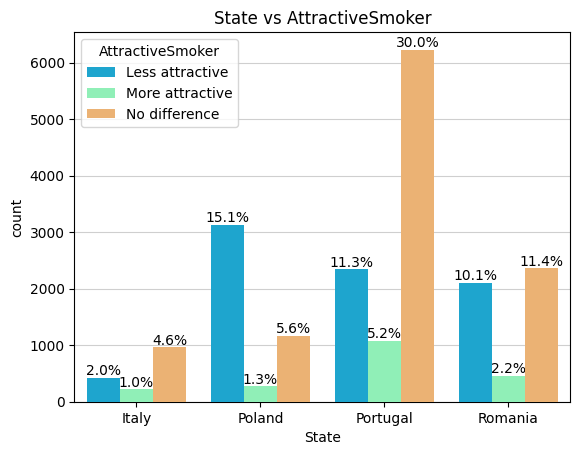

c:\Users\miaob\Desktop\tobacco-analysis\.venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


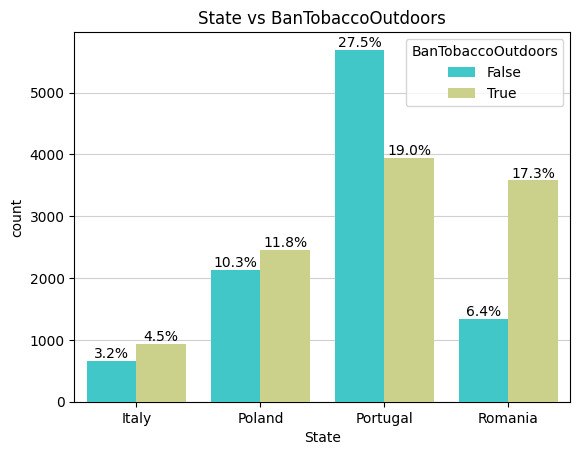

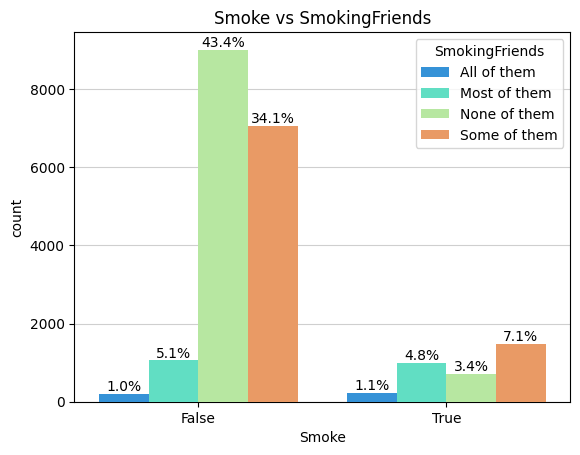

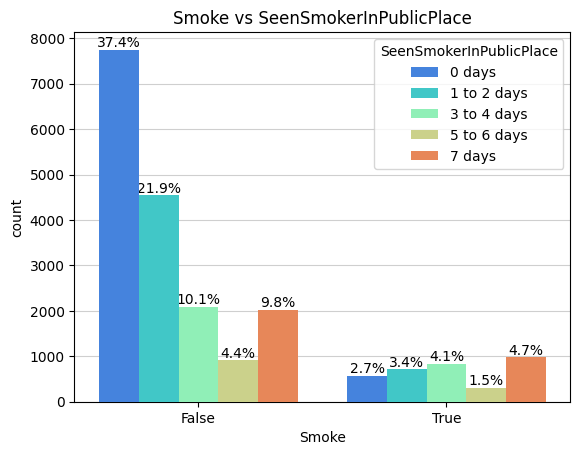

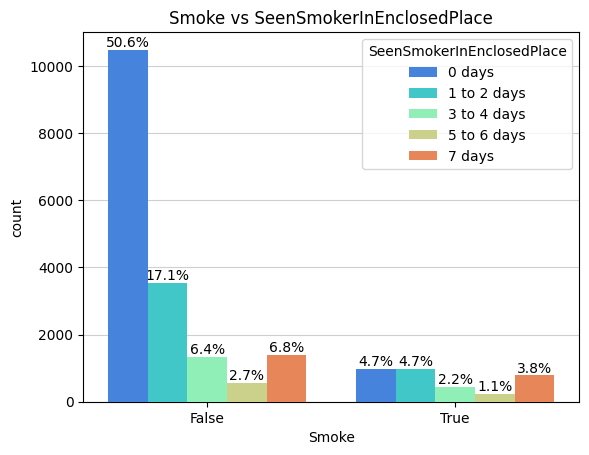

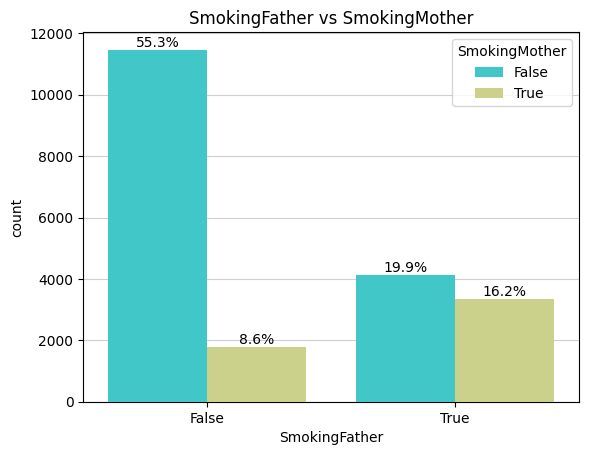

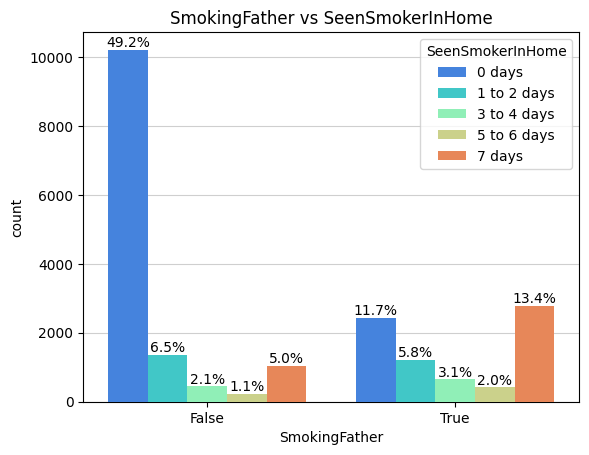

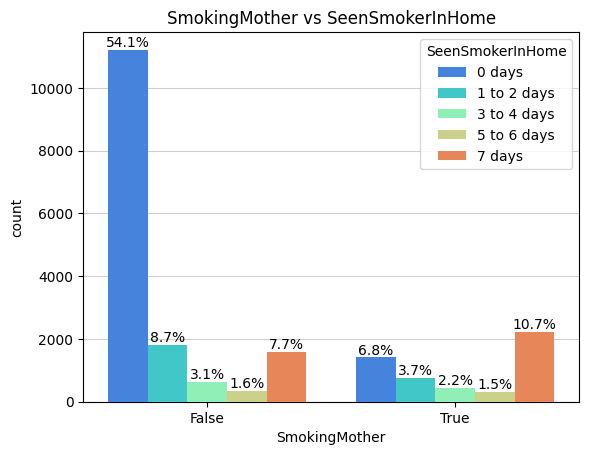

c:\Users\miaob\Desktop\tobacco-analysis\.venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


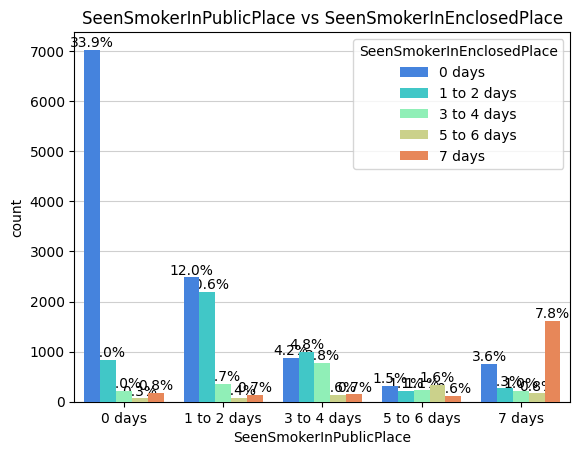

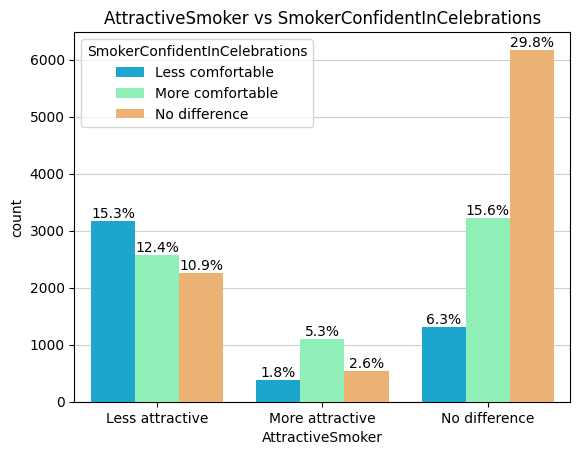

In [8]:
for i, col1 in enumerate(list_of_columns):
    for j, col2 in enumerate(list_of_columns):
        if i < j and association_table.loc[col1, col2] > 0.25:
            fig = plt.plot(figsize=(24, 16))
            ax = sns.countplot(x=col1, hue=col2, data=dataset, palette='rainbow', dodge=True, zorder=10)
            ax.grid(axis='y', alpha=0.6, zorder=0)
            for container in ax.containers:
                ax.bar_label(container, fmt=lambda x: f'{(x/len(dataset[col1]))*100:0.1f}%')
            ax.set(title=f"{col1} vs {col2}");
            
            plt.savefig(f"../../data/processed/multivariate_analysis/{col1}_histogram.png", dpi=600)
            plt.show()